In [2]:
#data analysis
import pandas as pd
import numpy as np

#data visualising
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

# models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor



In [3]:
train=pd.read_csv('train_NIR5Yl1.csv')
test=pd.read_csv('test_8i3B3FC.csv')
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
train['Tag'].unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

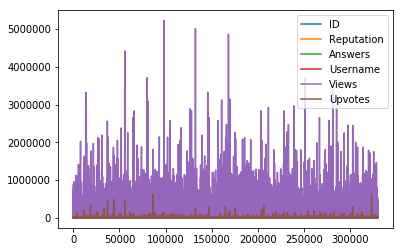

In [5]:
train.plot()


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [7]:
combine=[train,test]
tag_mapping={'a': 1,'c': 2,'r': 3,'j':4,'p': 5,'s': 6,'h': 7,'o': 8,'i': 9,'x':10}

for dataset in combine:
    dataset['Tag']=dataset['Tag'].map(tag_mapping).astype(int)
    
combine

[            ID  Tag  Reputation  Answers  Username     Views  Upvotes
 0        52664    1      3942.0      2.0    155623    7855.0     42.0
 1       327662    1     26046.0     12.0     21781   55801.0   1175.0
 2       468453    2      1358.0      4.0     56177    8067.0     60.0
 3        96996    1       264.0      3.0    168793   27064.0      9.0
 4       131465    2      4271.0      4.0    112223   13986.0     83.0
 5       345568    3       440.0      1.0     23866    5577.0      4.0
 6       376865    2       147.0      1.0     10759   17184.0     17.0
 7       467378    4      2269.0      2.0     54623     312.0      3.0
 8       393640    4       111.0      2.0    172926   53738.0     79.0
 9       130054    2      2749.0      1.0     10189     227.0      0.0
 10      218471    2      1142.0      7.0     71822  141836.0    166.0
 11      144119    5      2554.0      1.0    137817    8086.0     42.0
 12      155955    6       591.0      4.0     36550   16102.0     19.0
 13   

In [8]:
X=train[['ID','Tag','Reputation','Answers','Username','Views']]
y=train['Upvotes']
print(X.shape,train.shape)

((330045, 6), (330045, 7))


Ridge regression

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

linridge=Ridge(alpha=15)
linridge.fit(X_train,y_train)
linridge.score(X_test,y_test)


0.3230627511475842

In [10]:
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.3230627470784647

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
X_train_poly=X[['Tag','Answers']]
X_poly=poly.fit_transform(X_train_poly)

extf=pd.DataFrame(X_poly,columns=['Tag','Answers','Tag^2','Tag x Answers','Answers^2'])
#X_train_poly
mergedata=pd.merge(X,extf,how='outer',left_index=True,right_index=True)

X_train,X_test,y_train,y_test=train_test_split(mergedata,y,random_state=0)

In [12]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

linridge.fit(X_train_scaled,y_train)
linridge.score(X_test_scaled,y_test)


# test data scaling
test_poly=test[['Tag','Answers']]
test_poly=poly.fit_transform(test_poly)
test_poly_df=pd.DataFrame(test_poly,columns=['Tag','Answers','Tag^2','Tag x Answers','Answers^2'])


mergetestdata=pd.merge(test,test_poly_df,how='outer',left_index=True,right_index=True)

test_scaled=scaler.fit_transform(mergetestdata)
#test_poly_df


In [13]:
ext=ExtraTreesRegressor(n_estimators=28)
ext.fit(X_train_scaled,y_train)
ext.score(X_test_scaled,y_test)

0.8897027158652443

In [14]:
y_pred=ext.predict(test_scaled)

In [15]:
submission=pd.DataFrame({'ID': test['ID'],'Upvotes': y_pred})
submission

,ID,Upvotes
0,366953,265.821429
1,71864,71.714286
2,141692,34.250000
3,316833,14.107143
4,440445,392.214286
5,3514,25.250000
6,331420,13.821429
7,406540,106.321429
8,227379,54.642857
9,331687,25.607143


In [16]:
submission.to_csv('enigma.csv',index=False)